In [ ]:
import numpy as np
import keras,tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


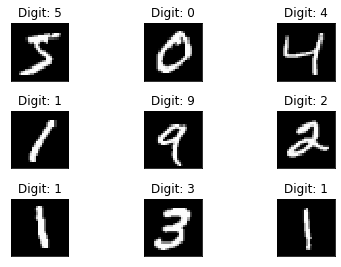

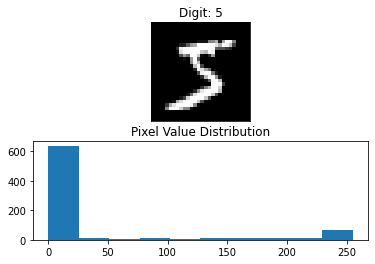

In [ ]:
# inverseImageBW_array(X_train)
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()


fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
plt.show()



In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)



Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/10
469/469 - 4s - loss: 0.2554 - accuracy: 0.9223 - val_loss: 0.1029 - val_accuracy: 0.9682
Epoch 2/10
469/469 - 1s - loss: 0.1015 - accuracy: 0.9694 - val_loss: 0.0767 - val_accuracy: 0.9752
Epoch 3/10
469/469 - 1s - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0776 - val_accuracy: 0.9753
Epoch 4/10
469/469 - 1s - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.0781 - val_accuracy: 0.9779
Epoch 5/10
469/469 - 1s - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0640 - val_accuracy: 0.9802
Epoch 6/10
469/469 - 1s - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0644 - val_accuracy: 0.9814
Epoch 7/10
469/469 - 1s - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0658 - val_accuracy: 0.9815
Epoch 8/10
469/469 - 1s - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 9/10
469/469 - 1s - loss: 0.0256 - accuracy: 0.9912 - val_loss: 0.0771 - val_accuracy: 0.9798
Epoch 10/10
469/469 - 1s - loss: 0.0258 - accuracy: 0.9909 - val_loss: 0.0693 - val_accuracy: 0.9826

{'loss': [0.255376935005188, 0.10146226733922958, 0.07244134694337845, 0.05494922399520874, 0.04466160759329796, 0.04032782465219498, 0.03434544801712036, 0.02825969271361828, 0.025571247562766075, 0.02581055648624897], 'accuracy': [0.9222666621208191, 0.9693833589553833, 0.9776166677474976, 0.982366681098938, 0.9856666922569275, 0.9869833588600159, 0.9886999726295471, 0.9904833436012268, 0.991183340549469, 0.9909499883651733], 'val_loss': [0.10286667197942734, 0.07674788683652878, 0.07763075083494186, 0.07805830985307693, 0.06400932371616364, 0.06439574062824249, 0.06580221652984619, 0.07219097018241882, 0.07713977992534637, 0.0693308413028717], 'val_accuracy': [0.9682000279426575, 0.9751999974250793, 0.9753000140190125, 0.9779000282287598, 0.9801999926567078, 0.9814000129699707, 0.9815000295639038, 0.9796000123023987, 0.9797999858856201, 0.9825999736785889]}


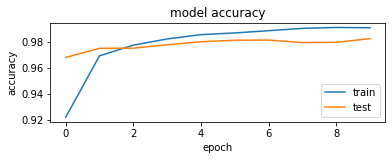

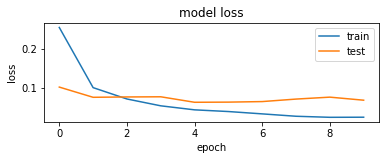

In [ ]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [ ]:
import cv2 as cv
import cv2
import numpy as np
img_size=(28,28)
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/IMG_20210226_135042~2.jpg", target_size=img_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

img_array = np.expand_dims(img_array, 0)  # Create batch axis
print(img_array.shape)
# img_array = tf.expand_dims(img_array, -1)

img_array = img_array.astype('int32')

(1, 28, 28)


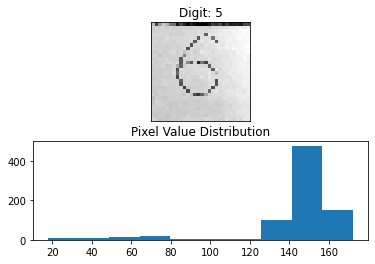

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The given Digit is 6


In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(img_array[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(img_array[0].reshape(784))
plt.title("Pixel Value Distribution")
plt.show()

img_array = img_array.reshape(1, 784)
img_array.shape
predictions = model.predict(img_array)
score = predictions[0]
print(score)
print("The given Digit is 6")


(1502, 1771)


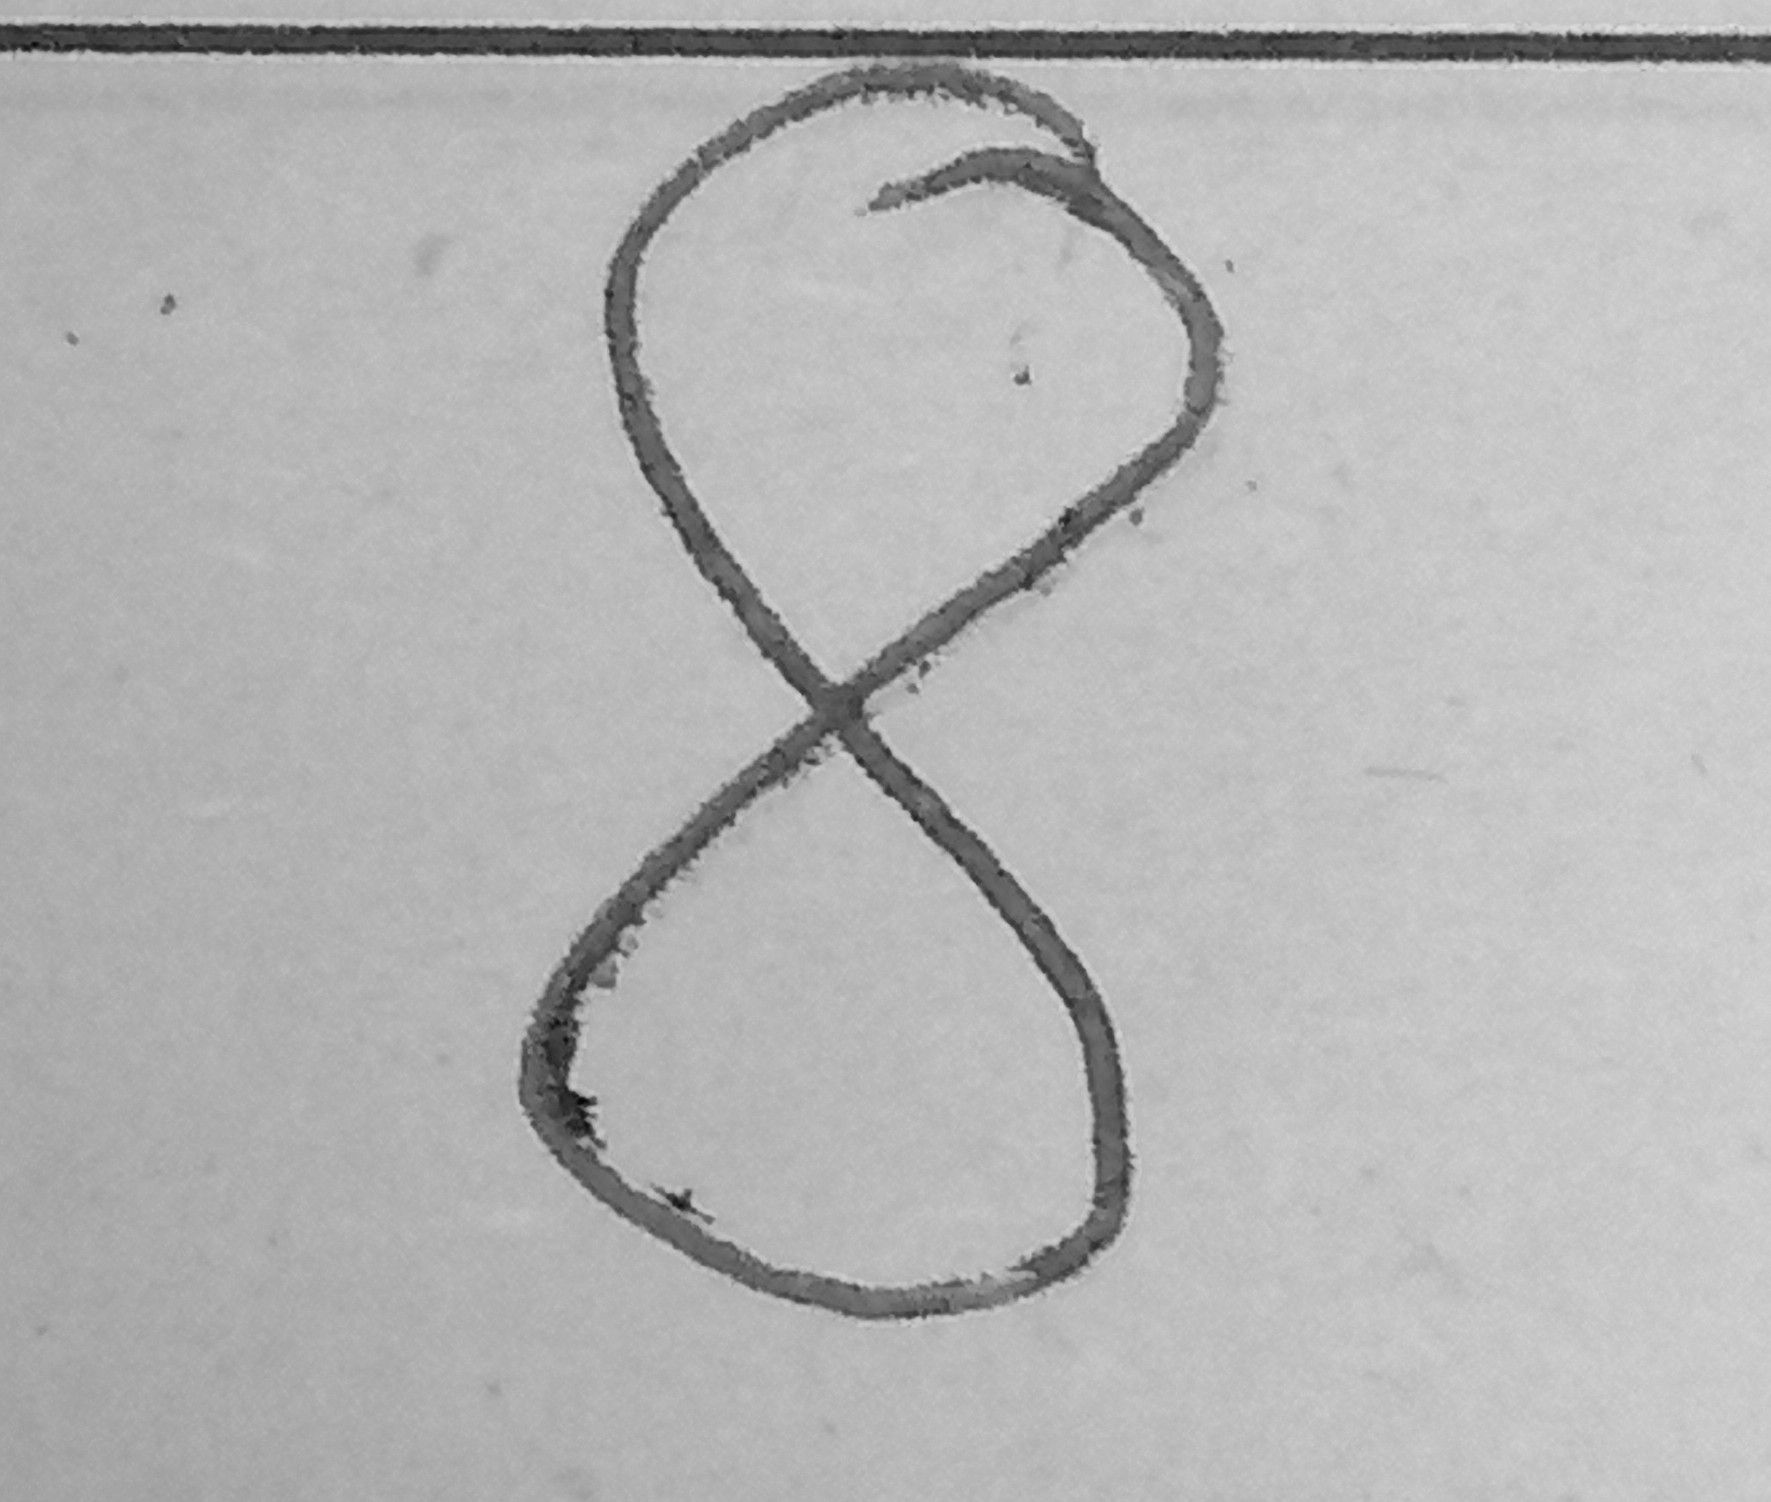

In [ ]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)

    return resized
img = cv2.imread("/content/drive/MyDrive/IMG_20210226_135042~3.jpg",0)         #image location
img.shape
print(img.shape)

cv2_imshow(img)
img_re=crop_square(img,28)


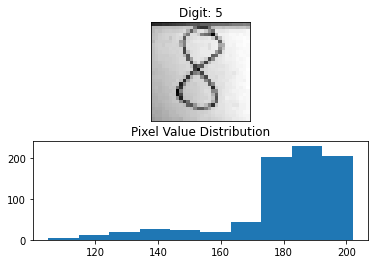

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(img_re, cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(img_re.reshape(784))
plt.title("Pixel Value Distribution")
plt.show()

In [ ]:
cv2_imshow(img_re)
img_re= img_re.reshape(1,784)
img_re= img_re.astype('float32')
# img_re /=255.
img_re.shape
predictions = model.predict(img_re)
score = predictions[0]
print(score)

In [ ]:
cv2_imshow(img)
cv2_imshow(img_re)

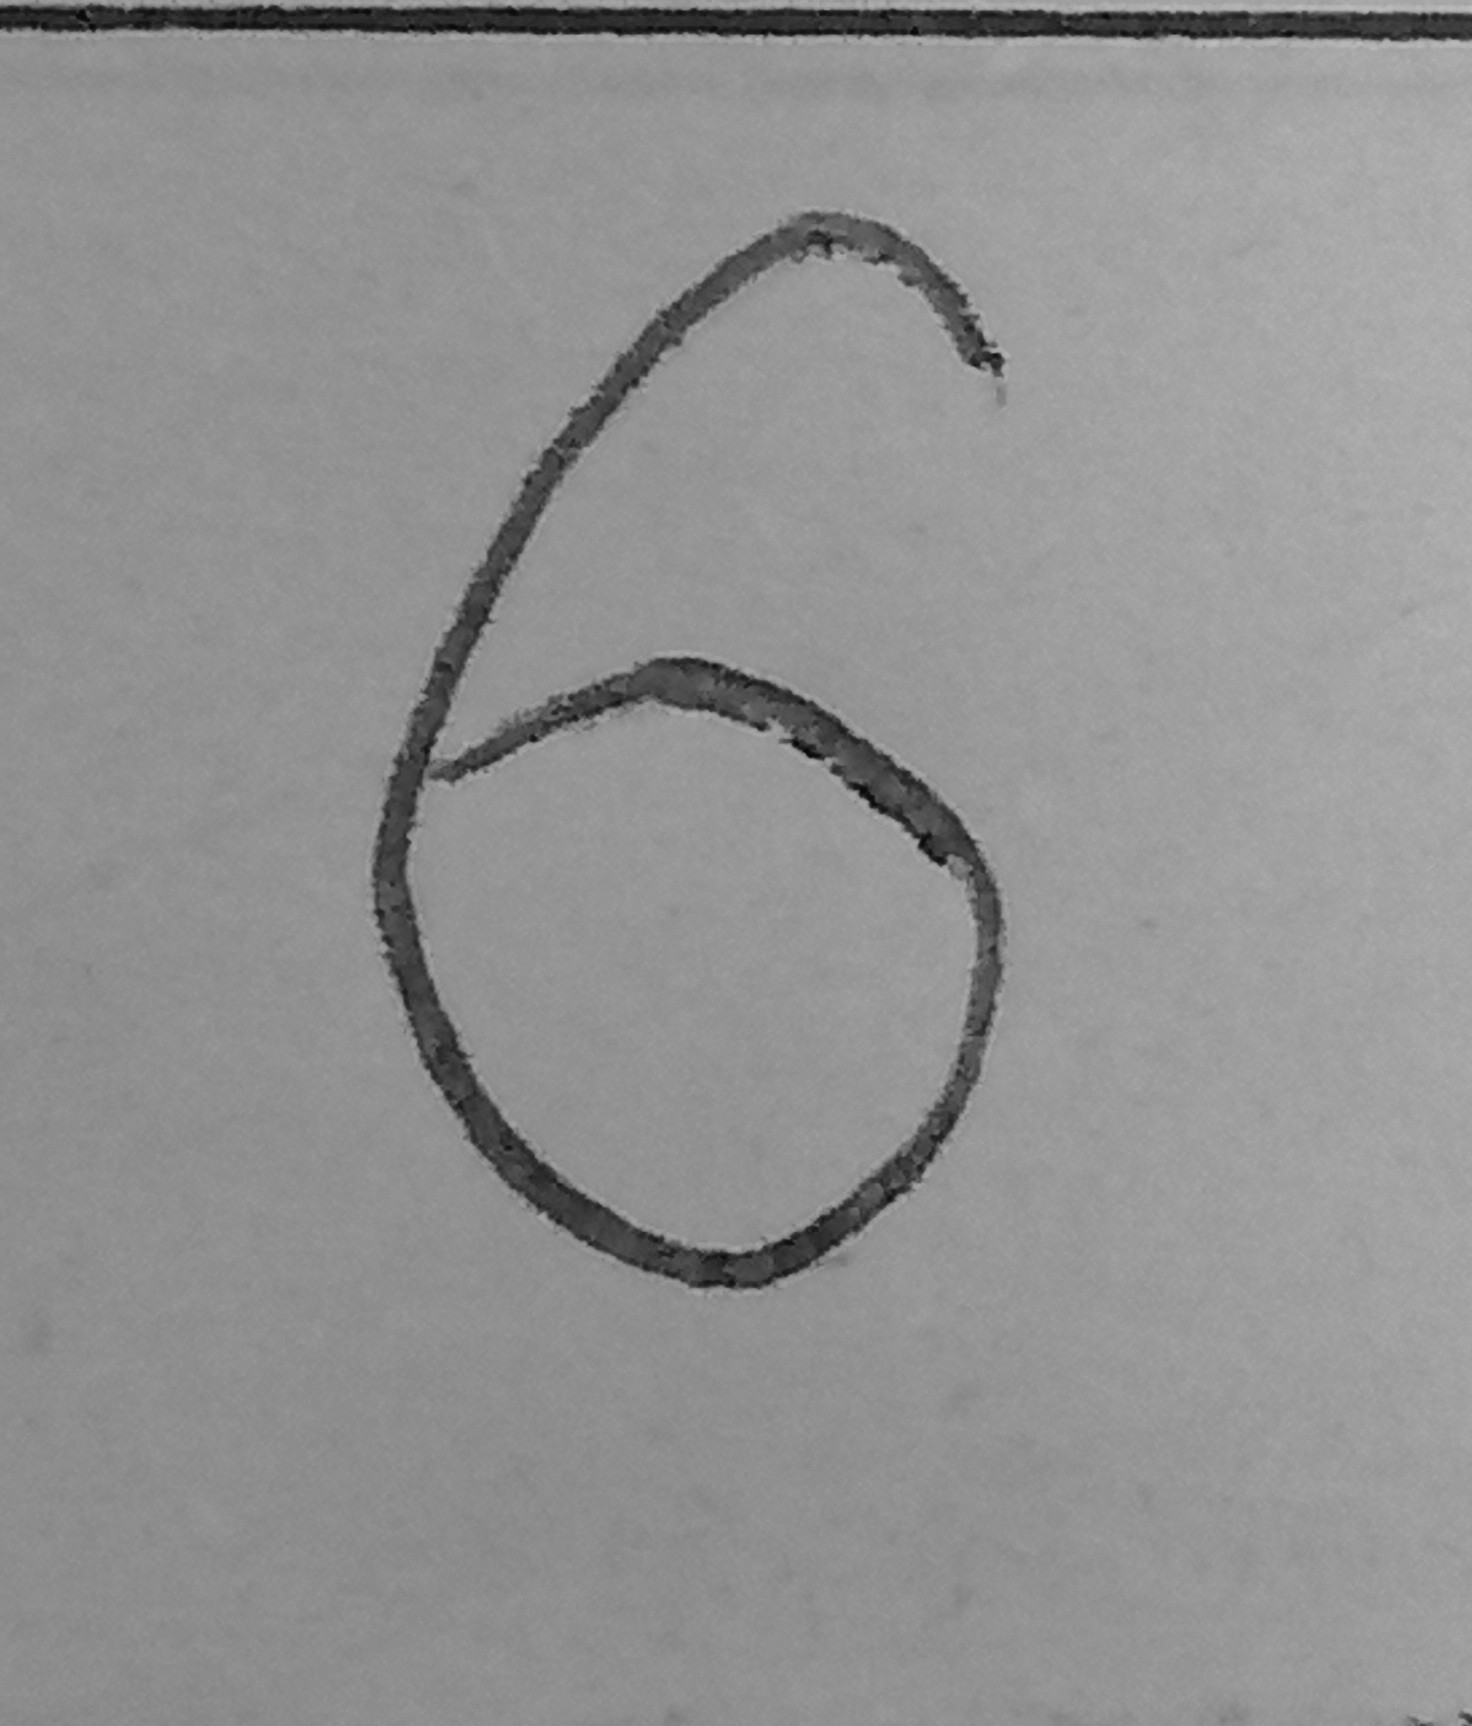

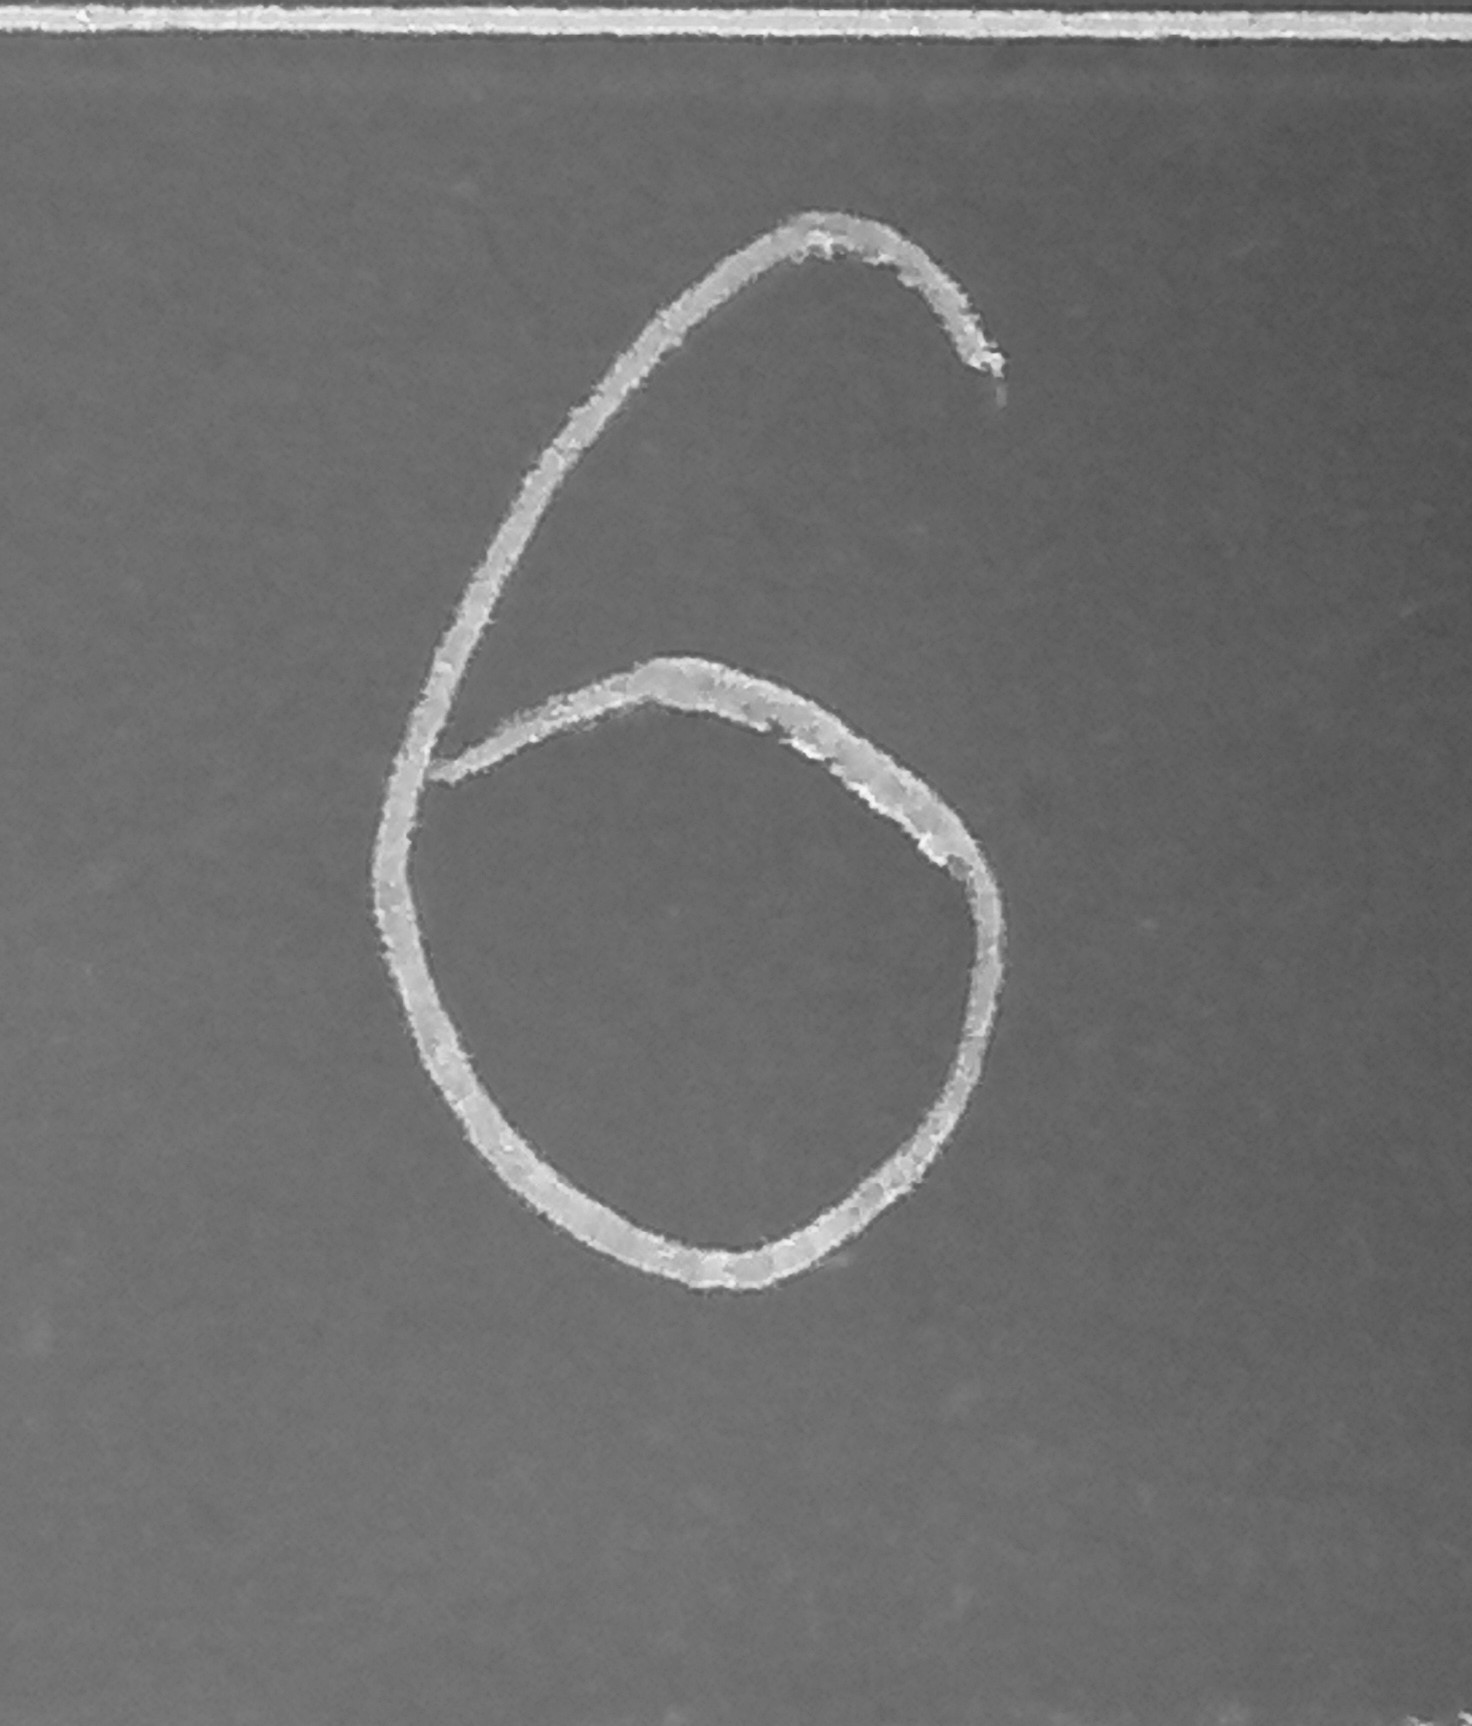

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/IMG_20210226_135042~2.jpg",0)
cv2_imshow(img)
img_not = cv2.bitwise_not(img)
cv2_imshow(img_not)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

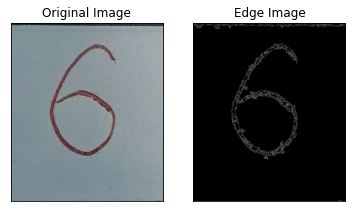

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/IMG_20210226_135042~2.jpg')
edges = cv.Canny(img,100,-900)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()